In [43]:
import pandas as pd
import numpy as np

from datetime import datetime

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', None)

In [128]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)[:200]

,date,United Kingdom,France,Belgium
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,2,0
3,2020-01-25,0,3,0
4,2020-01-26,0,3,0
5,2020-01-27,0,3,0
6,2020-01-28,0,4,0
7,2020-01-29,0,5,0
8,2020-01-30,0,5,0
9,2020-01-31,2,5,0


In [45]:
# beta/gamm is the reprodution number ----> means that 1 person can infect 4 persons (source:Media)
N0=1000000 #max susceptible population
beta=0.29   # infection spread dynamics
gamma=0.1  # recovery rate

# condition I0+S0+R0=N0
I0=df_analyse["United Kingdom"][30]
S0=N0-I0
R0=0

In [46]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [47]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\1716562261.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

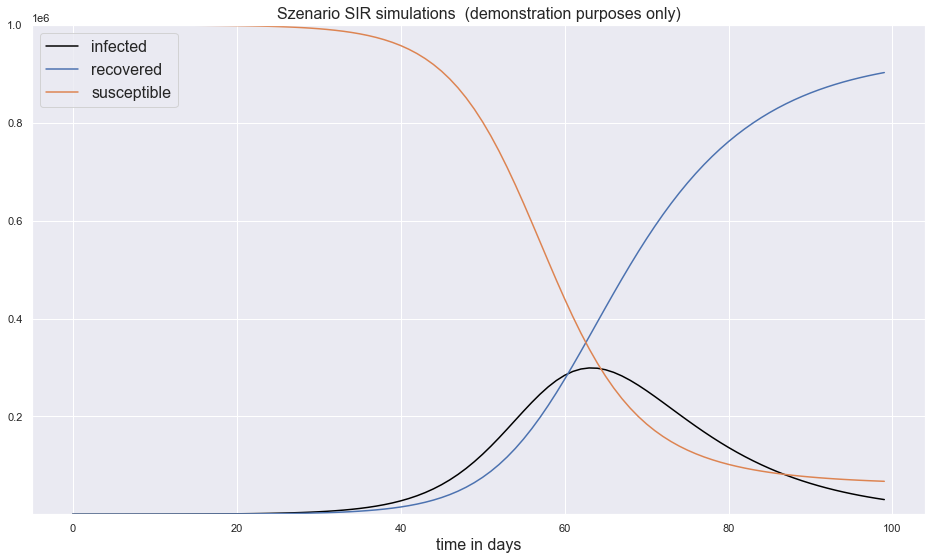

In [48]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='black')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

## Fitting the parameters of SIR model

In [82]:
ydata = np.array(df_analyse["United Kingdom"][33:])
b_data = np.array(df_analyse.Belgium[33:])
f_data = np.array(df_analyse.France[33:])
t=np.arange(len(ydata))

In [143]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0

In [144]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [145]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [146]:
# example curve of our differential equationa
popt=[0.34,0.14]
fit_odeint(t, *popt)

array([ 3.00000000e+01,  3.66416411e+01,  4.47534717e+01,  5.46608389e+01,
        6.67610412e+01,  8.15392189e+01,  9.95877419e+01,  1.21629860e+02,
        1.48548546e+02,  1.81421654e+02,  2.21564769e+02,  2.70583387e+02,
        3.30436436e+02,  4.03513524e+02,  4.92728802e+02,  6.01634876e+02,
        7.34560860e+02,  8.96779371e+02,  1.09470810e+03,  1.33615246e+03,
        1.63059666e+03,  1.98955147e+03,  2.42696738e+03,  2.95972228e+03,
        3.60819223e+03,  4.39691188e+03,  5.35532800e+03,  6.51864234e+03,
        7.92872976e+03,  9.63510023e+03,  1.16958478e+04,  1.41784948e+04,
        1.71605870e+04,  2.07298349e+04,  2.49835137e+04,  3.00267482e+04,
        3.59692262e+04,  4.29198298e+04,  5.09786945e+04,  6.02263581e+04,
        7.07100082e+04,  8.24274358e+04,  9.53101511e+04,  1.09208102e+05,
        1.23879317e+05,  1.38988142e+05,  1.54115217e+05,  1.68780561e+05,
        1.82478465e+05,  1.94719846e+05,  2.05075438e+05,  2.13212567e+05,
        2.18919580e+05,  

In [147]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\Viper\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\Viper\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [5.04727259e-03 3.14271565e-05]  start infect: 30
Optimal parameters: beta = 0.10113974453043412  and gamma =  -0.004397604354897962


In [148]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

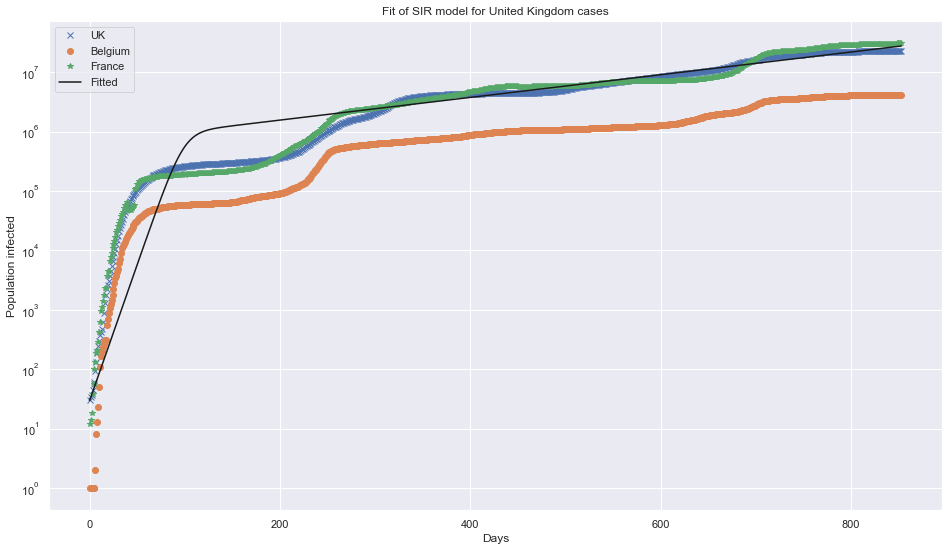

Optimal parameters: beta = 0.10113974453043412  and gamma =  -0.004397604354897962
Basic Reproduction Number R0  -22.998827627088993


In [152]:
plt.semilogy(t, ydata, 'x', label="UK")
plt.semilogy(t, b_data, 'o', label="Belgium")
plt.semilogy(t, f_data, '*', label="France")
plt.semilogy(t, fitted, color= "k", label="Fitted")
plt.title("Fit of SIR model for United Kingdom cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend(loc="upper left")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

### Observation:

Changing beta and gamma did not make a big difference, while changing the stating Value (I0 ---> start infec 30) made a huge difference in the fitting of the function.  
For example: By starting with I0= 27 came a function that has an error in about 230 and the fitting was completly wrong!

# Dynamic beta in SIR (infection rate)

In [65]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=45

beta_max=0.34
beta_min=0.14
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [66]:
len(pd_beta)

108

In [67]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_1108\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

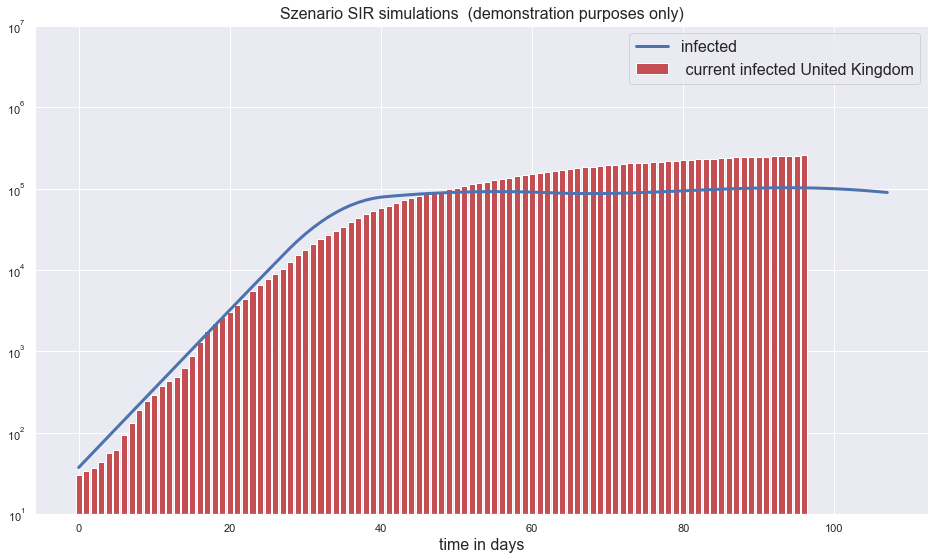

In [68]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)


t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected United Kingdom',color='r')
#ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
#ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
#ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
#ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
#ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 100*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});